# Image Super-Resolution Using Dense Skip Connections

In [2]:
# 그림을 실행한 브라우저에서 바로 볼 수 있도록
%matplotlib inline

# 구현에 필요한 모듈 import
import os
import matplotlib.pyplot as plt
from data import DIV2K
from model.dense import SRDenseNet
from train import DenseNetTrainer

In [3]:
# Super-resolution scale_factor
scale = 4

# Bicubic interpolation을 이용해서image downgrade
downgrade = 'bicubic'

In [4]:
# Model의 weight위치 지정
weights_dir = f'weights/espcn-x{scale}'
weights_file = os.path.join(weights_dir, 'weights.h5')

os.makedirs(weights_dir, exist_ok=True)

print(os.path.isdir(weights_dir))
print(os.path.isfile(weights_file))

True
True


## Datasets
- DIV2K dataset을 사용
 - 001.png ~ 800.png 이미지는 train set으로 사용
 - 801.png ~ 900.png 이미지는 validation set으로 사용

In [5]:
div2k_train = DIV2K(scale=scale, subset='train', downgrade=downgrade)
div2k_valid = DIV2K(scale=scale, subset='valid', downgrade=downgrade)

In [6]:
# train dataset 다운로드
train_ds = div2k_train.dataset(batch_size=16, random_transform=True, repeat_count=None)

# validation dataset 다운로드
valid_ds = div2k_valid.dataset(batch_size=1, random_transform=False, repeat_count=1)

# Training using DenseNet

In [7]:
# ESPCN Model 선언
trainer = DenseNetTrainer(model=SRDenseNet(nblocks=8, nlayers=8), 
                      checkpoint_dir=f'.ckpt/dense-x{scale}')

- 17시 시작

In [8]:
# 300,000 단계에 걸쳐서 EDSR모델을 훈련시키고, DIV2K의 validation set의 첫부분의 10개의 이미지에 대해서
# 1,000단계마다 모델을 평가합니다
# 모델을 평가할 대마다 checkpoint 저장
trainer.train(train_ds,
              valid_ds.take(10),
              steps=300000, 
              evaluate_every=1000, 
              save_best_only=True)

1000/300000: loss = 21.101, PSNR = 18.868755 (1621.83s)
2000/300000: loss = 19.156, PSNR = 18.784491 (1676.48s)
3000/300000: loss = 19.003, PSNR = 18.919153 (1652.84s)
4000/300000: loss = 18.933, PSNR = 18.905668 (1652.10s)
5000/300000: loss = 18.779, PSNR = 18.938286 (1664.39s)
6000/300000: loss = 18.761, PSNR = 18.904907 (1644.68s)
7000/300000: loss = 18.726, PSNR = 18.906649 (1639.18s)
8000/300000: loss = 18.760, PSNR = 18.901957 (1635.32s)
9000/300000: loss = 18.606, PSNR = 18.985508 (1634.28s)
10000/300000: loss = 18.524, PSNR = 18.924778 (1632.83s)
11000/300000: loss = 18.481, PSNR = 18.916677 (1645.34s)
12000/300000: loss = 18.598, PSNR = 18.937870 (1633.53s)
13000/300000: loss = 18.466, PSNR = 18.913311 (1634.96s)
14000/300000: loss = 18.638, PSNR = 18.934822 (1633.68s)
15000/300000: loss = 18.501, PSNR = 18.947565 (1632.32s)
16000/300000: loss = 18.540, PSNR = 18.895670 (1642.35s)
17000/300000: loss = 18.484, PSNR = 18.892727 (1635.80s)
18000/300000: loss = 18.451, PSNR = 18.9

145000/300000: loss = 18.162, PSNR = 18.963470 (1607.90s)
146000/300000: loss = 17.996, PSNR = 18.976421 (1617.62s)
147000/300000: loss = 17.994, PSNR = 18.983969 (1617.17s)
148000/300000: loss = 18.117, PSNR = 18.968611 (1610.93s)
149000/300000: loss = 18.125, PSNR = 18.988251 (1616.51s)
150000/300000: loss = 18.093, PSNR = 18.975500 (1620.93s)
151000/300000: loss = 18.109, PSNR = 18.968786 (1618.80s)
152000/300000: loss = 18.021, PSNR = 18.982168 (1613.28s)
153000/300000: loss = 18.090, PSNR = 18.984921 (1649.55s)
154000/300000: loss = 18.076, PSNR = 18.956110 (1619.96s)
155000/300000: loss = 18.169, PSNR = 18.971508 (1620.97s)
156000/300000: loss = 18.015, PSNR = 18.965399 (1623.29s)
157000/300000: loss = 17.861, PSNR = 18.964613 (1614.62s)
158000/300000: loss = 18.098, PSNR = 18.974682 (1611.55s)
159000/300000: loss = 18.104, PSNR = 18.985676 (1617.38s)
160000/300000: loss = 18.140, PSNR = 18.979771 (1620.03s)
161000/300000: loss = 18.136, PSNR = 18.960602 (1607.78s)
162000/300000:

287000/300000: loss = 18.020, PSNR = 18.976622 (1607.98s)
288000/300000: loss = 18.114, PSNR = 18.983486 (1613.73s)
289000/300000: loss = 17.979, PSNR = 18.974771 (1640.78s)
290000/300000: loss = 18.137, PSNR = 18.965700 (1609.96s)
291000/300000: loss = 17.956, PSNR = 18.978107 (1618.25s)
292000/300000: loss = 18.113, PSNR = 18.987919 (1614.53s)
293000/300000: loss = 18.180, PSNR = 18.969427 (1614.98s)
294000/300000: loss = 18.039, PSNR = 18.978848 (1613.71s)
295000/300000: loss = 18.007, PSNR = 18.977085 (1614.26s)
296000/300000: loss = 18.077, PSNR = 18.972157 (1615.54s)
297000/300000: loss = 18.025, PSNR = 18.981106 (1612.92s)
298000/300000: loss = 18.063, PSNR = 18.981503 (1616.00s)
299000/300000: loss = 18.068, PSNR = 18.980867 (1618.42s)
300000/300000: loss = 18.132, PSNR = 18.978189 (1614.83s)


In [9]:
# Restore from checkpoint with highest PSNR
trainer.restore()

Model restored from checkpoint at step 119000.


In [10]:
# Evaluate model on full validation set
psnrv = trainer.evaluate(valid_ds)
print(f'PSNR = {psnrv.numpy():3f}')

PSNR = 20.758469


In [11]:
# Save weights to separate location (needed for demo)
trainer.model.save_weights(weights_file)

# Demo

In [12]:
model = SRDenseNet(nblocks=8, nlayers=8)
model.load_weights(weights_file)

In [13]:
from model import resolve_single
from utils import load_image, plot_sample

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    sr = resolve_single(model, lr)
    plot_sample(lr, sr)

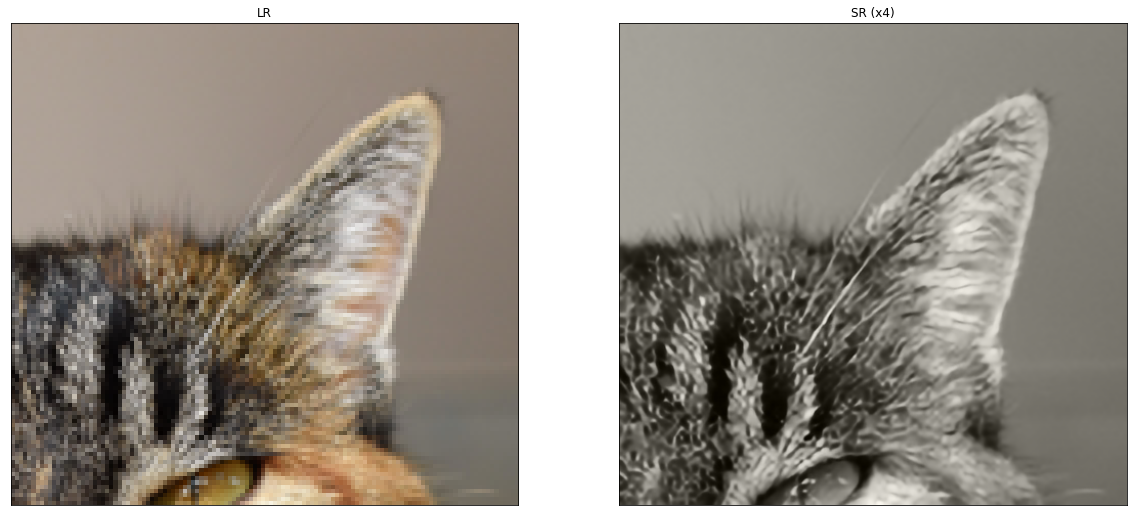

In [14]:
resolve_and_plot('demo/0869x4-crop.png')

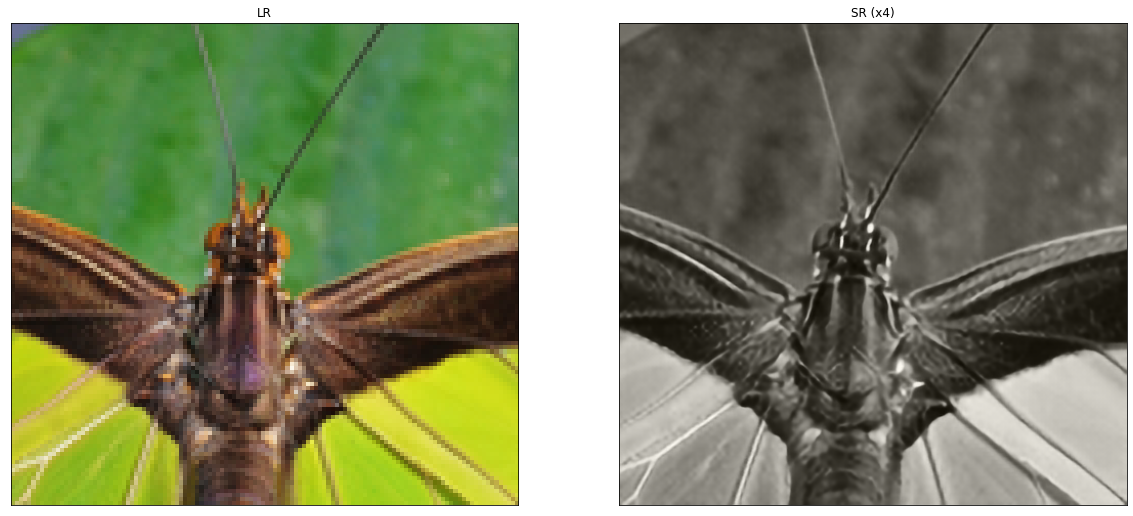

In [15]:
resolve_and_plot('demo/0829x4-crop.png')

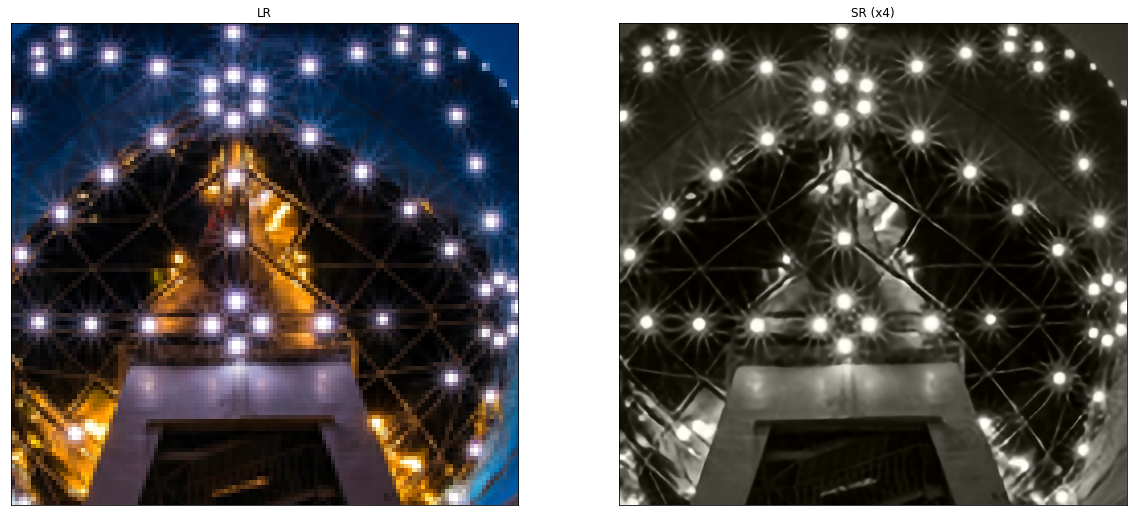

In [16]:
resolve_and_plot('demo/0851x4-crop.png')